# 0) Imports and Data Loading/Prep


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [4]:
url = "https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv"
full_df = pd.read_csv(url)

In [5]:
# check data
full_df.head(1)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [6]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [8]:
# we use only these features for ha#4
FEATURES = ['Make','Model','Year','Engine HP','Engine Cylinders','Transmission Type','Vehicle Style','highway MPG','city mpg','MSRP']
df = full_df[FEATURES]

In [10]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [11]:
df.head(1)

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135


In [12]:
# Check nulls
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [13]:
df = df.fillna(0)

In [14]:
# Check no nulls now
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [15]:
average = df.msrp.mean()
average

40594.737032063116

In [16]:
# define a binary outcome variable
df['above_average'] = (df.msrp>average).astype(int)

In [17]:
# check above_average is correct
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [18]:
del df['msrp']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_hp          11914 non-null  float64
 4   engine_cylinders   11914 non-null  float64
 5   transmission_type  11914 non-null  object 
 6   vehicle_style      11914 non-null  object 
 7   highway_mpg        11914 non-null  int64  
 8   city_mpg           11914 non-null  int64  
 9   above_average      11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [20]:
# train/test split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [21]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

del df_train['above_average']
del df_val['above_average']
del df_test['above_average']

In [22]:
# divide on CATEGORICAL + NUMERICAL variables set
CATEGORICAL = ['make','model','year','transmission_type','vehicle_style']
NUMERICAL = ['engine_hp','engine_cylinders','highway_mpg','city_mpg']

# check: no other vars 
rest = [x for x in df_train.keys() if x not in CATEGORICAL+NUMERICAL]
rest

[]

# Q1 : ROC AUC feature importance
qq: ROC AUC score is max for which feature?
Answer: max ROC AUC score is for engine_hp

In [25]:
# Q1 : ROC AUC feature importance
from sklearn.metrics import roc_auc_score


res = {}
for feature in ['engine_hp','engine_cylinders','highway_mpg','city_mpg']:
  score = roc_auc_score(y_train, df_train[feature])
  if score<0.5:
    score = roc_auc_score(y_train, -df_train[feature])
  res[feature] = score

sorted_res =  sorted(res.items(), key=lambda x:x[1])
print(sorted_res)
print(f'Highest AUC is for :{sorted_res[-1]}')

[('highway_mpg', 0.6330587871772013), ('city_mpg', 0.6734244643245233), ('engine_cylinders', 0.766116490165669), ('engine_hp', 0.9171031265539011)]
Highest AUC is for :('engine_hp', 0.9171031265539011)


# Q2: Training the model
qq: what's the AUC on valid dataset (3 digits)?

In [26]:
dv = DictVectorizer(sparse=False)

train_dict = df_train[CATEGORICAL + NUMERICAL].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

In [27]:
# Q2: training the model
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)
# what's the AUC on valid dataset (3 digits)?

LogisticRegression(max_iter=1000, solver='liblinear')

In [28]:
val_dict = df_val[CATEGORICAL + NUMERICAL].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [37]:
y_pred = model.predict_proba(X_val)[:, 1]

decision = (y_pred >= 0.5)
(y_val == decision).mean()


0.931598825010491

In [43]:
# Predictions
np.round(y_pred[0:10],3)

array([0.642, 0.015, 0.485, 0.113, 0.   , 0.   , 0.001, 0.104, 0.938,
       0.568])

In [44]:
# Real data
y_val[0:10]

323      1
4691     0
8418     0
9078     0
10856    0
2656     0
2562     0
5770     0
11176    1
4759     1
Name: above_average, dtype: int64

In [30]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val,y_pred)


In [31]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_val,y_pred)

In [35]:
#Q2 : AUC is 0.979 or 0.98
print(f'AUC full precision = {auc}, and rounded to 3-digits = {round(auc,3)}')

AUC full precision = 0.9765698650295463, and rounded to 3-digits = 0.977


# Q3: Precision and Recall

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_val, y_pred >= 0.5)

0.931598825010491

In [45]:
# define different threshold and check accuracy
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.274
0.05 0.796
0.10 0.851
0.15 0.881
0.20 0.895
0.25 0.903
0.30 0.913
0.35 0.919
0.40 0.927
0.45 0.928
0.50 0.932
0.55 0.932
0.60 0.924
0.65 0.919
0.70 0.916
0.75 0.912
0.80 0.903
0.85 0.889
0.90 0.869
0.95 0.842
1.00 0.726


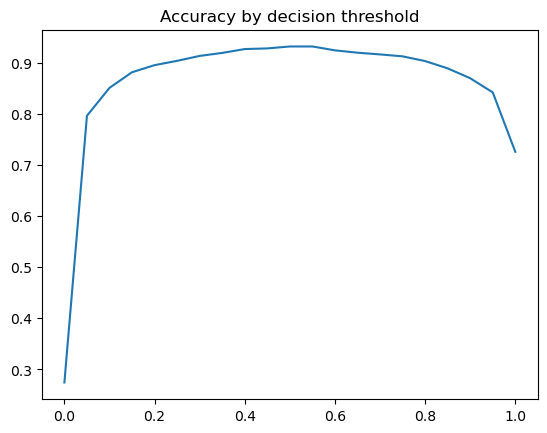

In [46]:
plt.plot(thresholds,scores)
plt.title("Accuracy by decision threshold") 
plt.show()

In [47]:
# updagraged tpr_fpr_dataframe
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        precision = tp / (tp + fp)
        recall = tp / (tp + fn)
        f1_score = 2*precision*recall / (precision+recall)

        scores.append((t, tp, fp, fn, tn, precision, recall, f1_score))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn','precision','recall','f1_score']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [48]:
df_scores = tpr_fpr_dataframe(y_val, y_pred)

/tmp/ipykernel_11999/2607061840.py:20: RuntimeWarning: invalid value encountered in scalar divide
  precision = tp / (tp + fp)


In [49]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall,f1_score,tpr,fpr
0,0.00,654,1729,0,0,0.274444,1.000000,0.430688,1.000000,1.000000
1,0.01,652,839,2,890,0.437290,0.996942,0.607925,0.996942,0.485252
2,0.02,651,680,3,1049,0.489106,0.995413,0.655919,0.995413,0.393291
3,0.03,651,592,3,1137,0.523733,0.995413,0.686347,0.995413,0.342394
4,0.04,650,543,4,1186,0.544845,0.993884,0.703844,0.993884,0.314054
...,...,...,...,...,...,...,...,...,...,...
96,0.96,255,1,399,1728,0.996094,0.389908,0.560440,0.389908,0.000578
97,0.97,237,1,417,1728,0.995798,0.362385,0.531390,0.362385,0.000578
98,0.98,211,0,443,1729,1.000000,0.322630,0.487861,0.322630,0.000000
99,0.99,181,0,473,1729,1.000000,0.276758,0.433533,0.276758,0.000000


<Axes: title={'center': 'Precision, Recall, and F1 score'}, xlabel='threshold'>

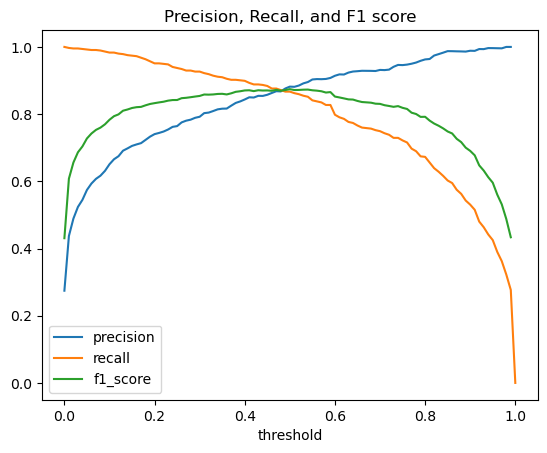

In [50]:
df_scores.plot.line(x='threshold', 
                    y=['precision','recall', 'f1_score'],
                    title = 'Precision, Recall, and F1 score')

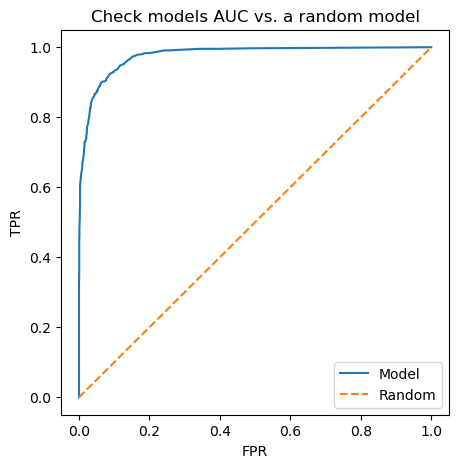

In [54]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], 
         label='Random', 
         linestyle='--')
plt.title(f'Check model''s AUC vs. a random model' )
plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

In [55]:
df_scores['abs_diff_precision_recall'] = np.abs(df_scores.precision - df_scores.recall)

In [56]:
# Q3: ANSWER WHEN PRECISION AND RECALL INTERSECT: 0.47-0.49
df_scores[df_scores.abs_diff_precision_recall<0.01]

,threshold,tp,fp,fn,tn,precision,recall,f1_score,tpr,fpr,abs_diff_precision_recall
47,0.47,573,87,81,1642,0.868182,0.876147,0.872146,0.876147,0.050318,0.007965
48,0.48,570,87,84,1642,0.867580,0.871560,0.869565,0.871560,0.050318,0.003980
49,0.49,567,80,87,1649,0.876352,0.866972,0.871637,0.866972,0.046270,0.009380


# Q4 Get F1-score

In [57]:
f1_max = df_scores.f1_score.max()
f1_max

0.8743253662297611

In [58]:
# real max f1 is for the threshold = 0.49
df_scores[df_scores.f1_score==f1_max]

,threshold,tp,fp,fn,tn,precision,recall,f1_score,tpr,fpr,abs_diff_precision_recall
50,0.5,567,76,87,1653,0.881804,0.866972,0.874325,0.866972,0.043956,0.014832


In [59]:
# it is likely the answer is 0.52
df_scores[df_scores.threshold.isin([0.12,0.32,0.52,0.72])]

,threshold,tp,fp,fn,tn,precision,recall,f1_score,tpr,fpr,abs_diff_precision_recall
12,0.12,641,309,13,1420,0.674737,0.980122,0.799252,0.980122,0.178716,0.305385
32,0.32,601,146,53,1583,0.804552,0.918960,0.857959,0.918960,0.084442,0.114409
52,0.52,562,73,92,1656,0.885039,0.859327,0.871994,0.859327,0.042221,0.025712
72,0.72,483,35,171,1694,0.932432,0.738532,0.824232,0.738532,0.020243,0.193900


# Q5 : 5-fold CV

In [60]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

In [61]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[CATEGORICAL + NUMERICAL].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [62]:
def predict(df, dv, model):
    dicts = df[CATEGORICAL + NUMERICAL].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [63]:
# returns (C, mean_scores, stddev_scores)
def perform_k_fold(n_splits=5, C=1.0):
  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
  
  scores = []

  for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train, C=C)
    y_pred = predict(df_val, dv, model)
    
    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)
  
  return (C, np.mean(scores), np.std(scores))

In [64]:
q5 = perform_k_fold()
q5

(1.0, 0.9791750559536228, 0.002919359965989712)

In [67]:
# STD DEV is close to 0.003
print(f' Full precision {q5[2]}, 3-digits rounding {round(q5[2],3)}')

 Full precision 0.002919359965989712, 3-digits rounding 0.003


# Q6: Hyperparams tuning

In [68]:
for C in tqdm([0.01, 0.1, 0.5, 10]):
  res = perform_k_fold(C=C)
  print(f'C={res[0]}, mean score ={round(res[1],3)}, stddev score= {round(res[2],3)}')

  0%|          | 0/4 [00:00<?, ?it/s]

C=0.01, mean score =0.952, stddev score= 0.002
C=0.1, mean score =0.972, stddev score= 0.002
C=0.5, mean score =0.979, stddev score= 0.001
C=10, mean score =0.981, stddev score= 0.003


In [69]:
# ANSWER : best mean score is for C=10 (mean_score = 0.981)